In [4]:

import matplotlib.pyplot as plt
import numpy as np
import matplotlib
matplotlib.rc('xtick', labelsize=15) 
matplotlib.rc('ytick', labelsize=15) 
import torch
import numpy as np
import pandas as pd
import json
import matplotlib.patches as mpatches

In [7]:
path_EVAL_DB = '../db_EVAL.csv'
path_TRAIN_DB = '../db_TRAIN.csv'
EVAL_db = pd.read_csv(path_EVAL_DB, index_col=0)
TRAIN_db = pd.read_csv(path_TRAIN_DB, index_col=0)
with open('../config_eval.json') as config_file:
    dico_config = json.load(config_file)
print(dico_config)

{'gaussian': {'param': [1, 2, 3, 4], 'lr_svi': 0.001}, 'white': {'param': [0, 0.2, 0.4, 0.6, 0.8, 1], 'lr_svi': 0.01}, 'saltpepper': {'param': [0.1, 0.2, 0.3, 0.4], 'lr_svi': 0.01}}


In [267]:
## TO DO
## 1 - normalize the image for Gaussian filtering
## 2 - Do the CNN baseline
## 3 - Do a bar graph for beta
## 4 - Try with a l2 loss decoder (i.e. gaussian input)
## 5 - Try with a Gaussian mixture prior

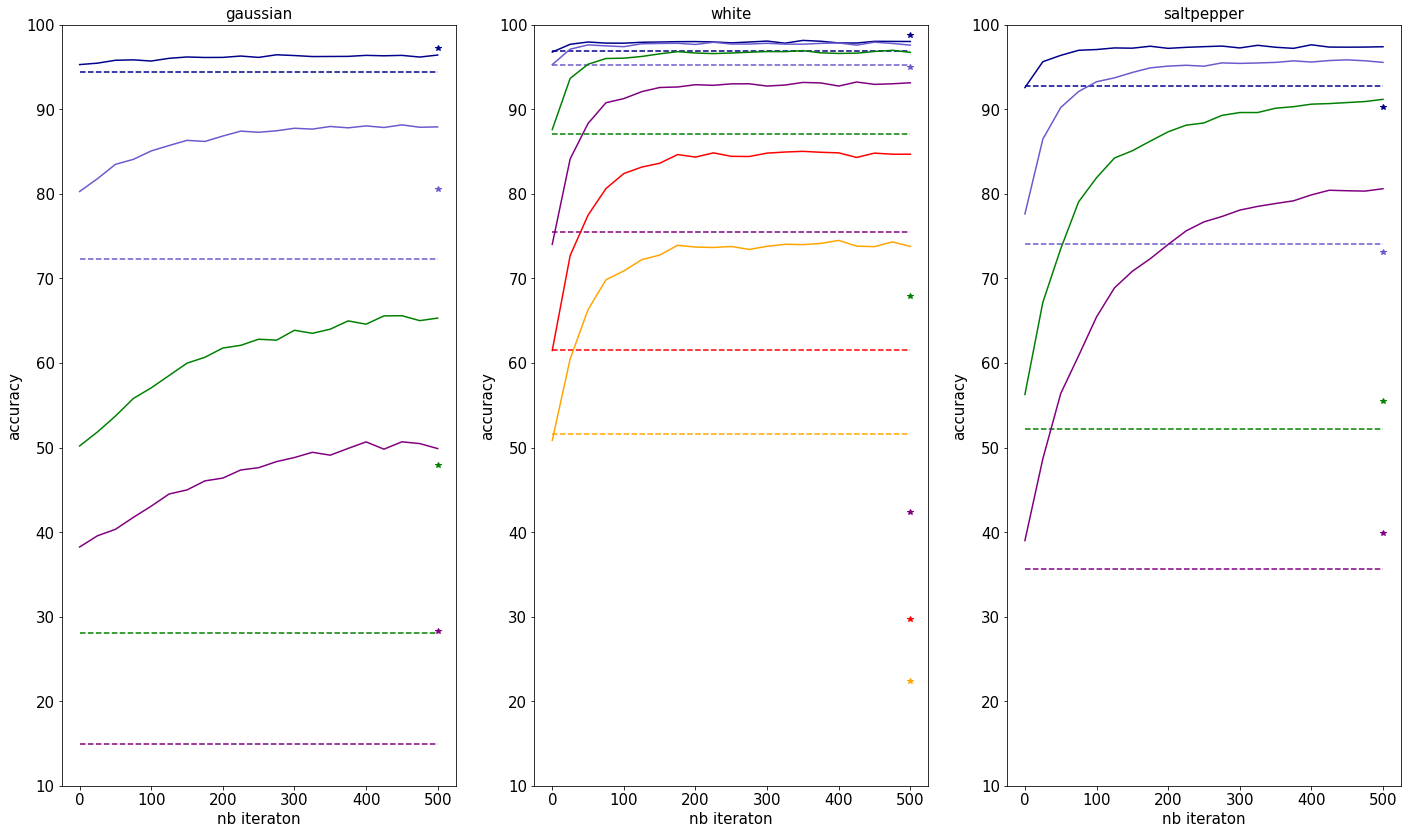

In [12]:
beta = 1
#transform = 'white'
#param_list = [0, 0.2, 0.4, 0.6, 0.8]
fig, ax = plt.subplots(1, 3 ,figsize=(24,14))

color_list = ['darkblue','slateblue', 'green', 'purple','red', 'orange']
nb_it = 500.0
zdim = 15.0
#svi_lr_eval = 5e-3
list_it = np.arange(0,501,25)
#print(len(list_it))

for idx_graph, noise_type in enumerate(dico_config.keys()):
    #print(noise_type)

    for idx_param, param in enumerate(dico_config[noise_type]['param']):
        
        model_type = 'CL'
        out_CL = EVAL_db.loc[(EVAL_db['model_type'] == model_type) & \
                     (EVAL_db['transform'] == noise_type) & \
                     (EVAL_db['normalize_output'] == 1.0) & \
                     (EVAL_db['param'] == param), 'path_to_results'].values[0]
        

        accu_CL = torch.load('../' + out_CL)['accuracy']
        accu_CL = accu_CL.cpu().numpy()
        
        ax[idx_graph].plot(list_it[-1], accu_CL, '*', color=color_list[idx_param], label=r'CL - $\sigma$={}'.format(param))

        

        model_type = 'VAE'
        out_VAE = EVAL_db.loc[(EVAL_db['model_type'] == model_type) & \
                 (EVAL_db['model_z_dim'] == zdim) & \
                 (EVAL_db['beta'] == beta) & \
                 (EVAL_db['transform'] == noise_type) & \
                 (EVAL_db['normalize_output'] == 1.0) & \
                 #(EVAL_db['svi_nb_it_eval'] == nb_it) & \
                 (EVAL_db['param'] == param), 
                              'path_to_results'].values[0]
        
        #print(out_VAE)
        
        
        accu_VAE = torch.load('../' + out_VAE)['accuracy']
        ax[idx_graph].plot([list_it[0],list_it[-1]], [accu_VAE, accu_VAE], '--', color=color_list[idx_param], label=r'VAE - $\sigma$={}'.format(param))
        model_type = 'IVAE'
        #print(dico_config[noise_type]['lr_svi'])
        out_IVAE = EVAL_db.loc[(EVAL_db['model_type'] == model_type) & \
                 (EVAL_db['model_z_dim'] == zdim) & \
                 (EVAL_db['beta'] == beta) & \
                 (EVAL_db['transform'] == noise_type) & \
                 (EVAL_db['normalize_output'] == 1.0) & \
                 (EVAL_db['svi_lr_eval'] == dico_config[noise_type]['lr_svi']) & \
                 (EVAL_db['svi_nb_it_eval'] == nb_it) & \
                 (EVAL_db['param'] == param), 'path_to_results'].values[0]
        #print(out_IVAE)
        #print(out_IVAE)
        accu_IVAE = torch.load('../' + out_IVAE)['accuracy']
        #print(len(accu_IVAE))
        ax[idx_graph].plot(list_it, accu_IVAE, color=color_list[idx_param], label=r'IVAE - $\sigma$={}'.format(param))
    ax[idx_graph].set_title('{}'.format(noise_type), fontsize=15)
    ax[idx_graph].set_ylim(10, 100)
    ax[idx_graph].set_xlabel('nb iteraton', fontsize=15)
    ax[idx_graph].set_ylabel('accuracy', fontsize=15)

    #ax[idx_graph].legend(loc='center', bbox_to_anchor=(1,1), fontsize=15, ncol=3)



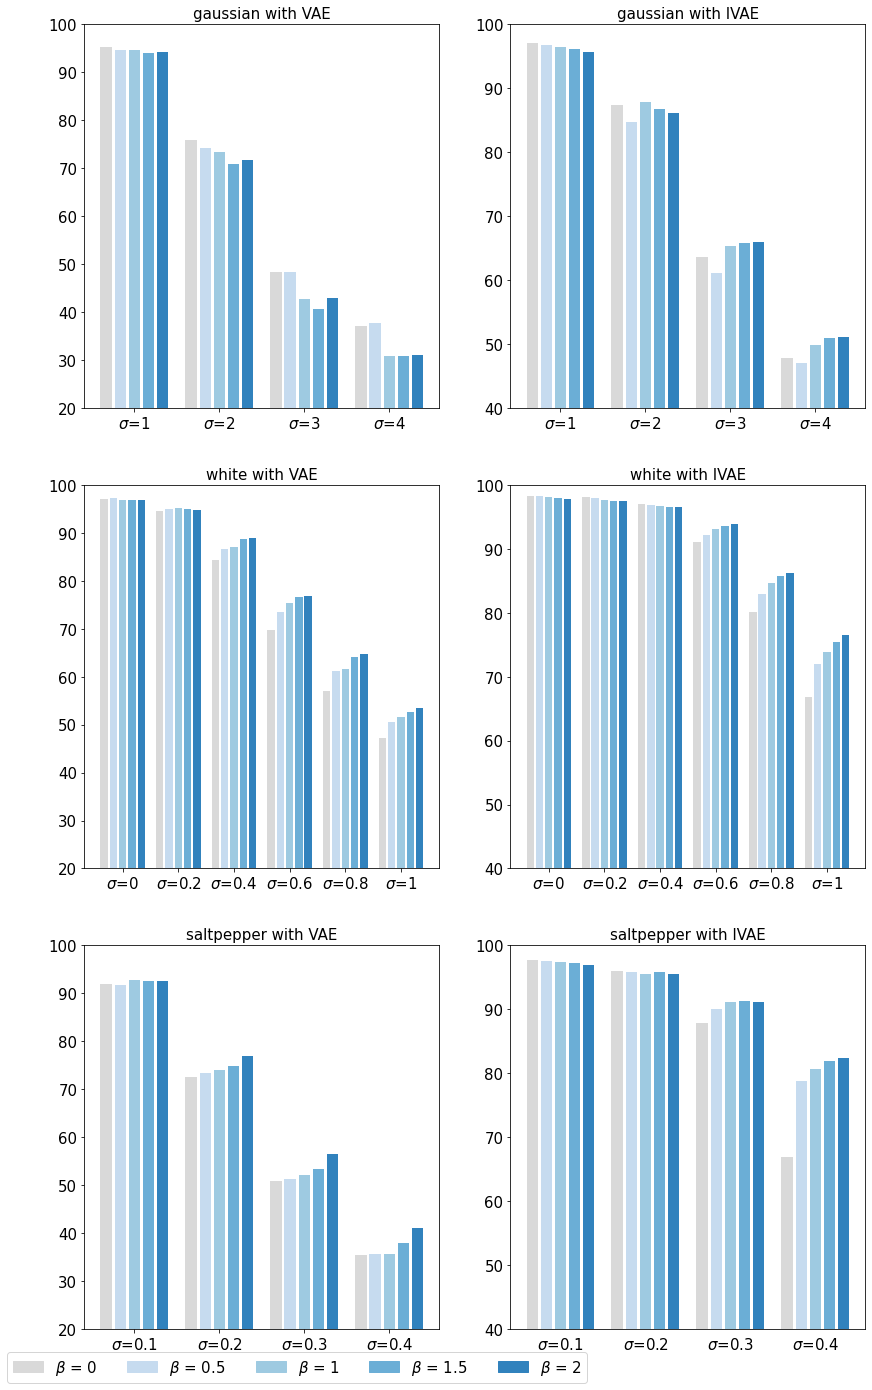

In [15]:
cmap = plt.cm.get_cmap('tab20c')
all_color = [cmap.colors[19], cmap.colors[3], cmap.colors[2], cmap.colors[1], cmap.colors[0]]

zdim=15.0
beta_list = [0,0.5,1,1.5,2]
nb_it = 500.0

fig, ax = plt.subplots(3,2,figsize=(14,24))

plt.tick_params(
            axis='x',         
            which='both',     
            bottom=False,      
            top=False,        
            labelbottom=True)  
    

i = 0

noise_type = "white"


for idx_noise, noise_type in enumerate(dico_config.keys()):
    param_list = dico_config[noise_type]['param']
    tick_position = [2+ 6*i for i in range(len(param_list))] 

    i=0
    for idx_param, param in enumerate(param_list):

        for idx_beta, beta in enumerate(beta_list):

            model_type = 'VAE'
            out_VAE = EVAL_db.loc[(EVAL_db['model_type'] == model_type) & \
                     (EVAL_db['model_z_dim'] == zdim) & \
                     (EVAL_db['beta'] == beta) & \
                     (EVAL_db['transform'] == noise_type) & \
                     (EVAL_db['normalize_output'] == 1.0) & \
                     (EVAL_db['svi_lr_eval'] == dico_config[noise_type]['lr_svi']) & \
                     (EVAL_db['svi_nb_it_eval'] == nb_it) & \
                     (EVAL_db['param'] == param), 
                                   'path_to_results'].values[0]

            accu_VAE = torch.load('../'+ out_VAE)['accuracy']

            ax[idx_noise, 0].bar(i, accu_VAE, color=all_color[idx_beta], label=r'$\beta$ = {0}'.format(beta))
            i = i+1 

        i = i+1
    ax[idx_noise,0].set_xticks(tick_position) 
    ax[idx_noise,0].set_ylim(20,100)
    ax[idx_noise,0].set_title(noise_type + ' with VAE', fontsize=15)
    ax[idx_noise,0].set_xticklabels([r'$\sigma$={0}' .format(param) for param in param_list ], fontsize=15)

    
    i=0
    for idx_param, param in enumerate(param_list):

        for idx_beta, beta in enumerate(beta_list):
            model_type = 'IVAE'
            out_IVAE = EVAL_db.loc[(EVAL_db['model_type'] == model_type) & \
                     (EVAL_db['model_z_dim'] == zdim) & \
                     (EVAL_db['beta'] == beta) & \
                     (EVAL_db['transform'] == noise_type) & \
                     (EVAL_db['normalize_output'] == 1.0) & \
                     (EVAL_db['svi_lr_eval'] == dico_config[noise_type]['lr_svi']) & \
                     (EVAL_db['svi_nb_it_eval'] == nb_it) & \
                     (EVAL_db['param'] == param), 
                                   'path_to_results'].values[0]

            accu_IVAE = torch.load('../' + out_IVAE)['accuracy']

            ax[idx_noise,1].bar(i, accu_IVAE[-1], color=all_color[idx_beta], label=r'$\beta$ = {0}'.format(beta))

            i = i+1

        i = i+1

    ax[idx_noise,1].set_xticks(tick_position) 
    ax[idx_noise,1].set_ylim(40,100)
    ax[idx_noise,1].set_title(noise_type + ' with IVAE', fontsize=15)
    ax[idx_noise,1].set_xticklabels([r'$\sigma$={0}' .format(param) for param in param_list ], fontsize=15)

    
## just for legend
patches = []
for idx_beta, color in enumerate(all_color):
    patches.append(mpatches.Patch(color=color, label=r'$\beta$ = {0}'.format(beta_list[idx_beta])))
out = plt.legend(handles=patches, fontsize=15, loc='center', bbox_to_anchor=(-0.6,-0.1), ncol=5)
